In [6]:
# 5_xai_rf_shap.ipynb - Random Forest + SHAP Explainability for Stroke Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap





In [8]:
# Load preprocessed data
df = pd.read_csv('/content/preprocessed_stroke_data.csv')

# Split features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [13]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
[[886  87]
 [ 30 942]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       973
           1       0.92      0.97      0.94       972

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

ROC AUC Score: 0.9873159673319546


 99%|===================| 3868/3890 [02:37<00:00]       

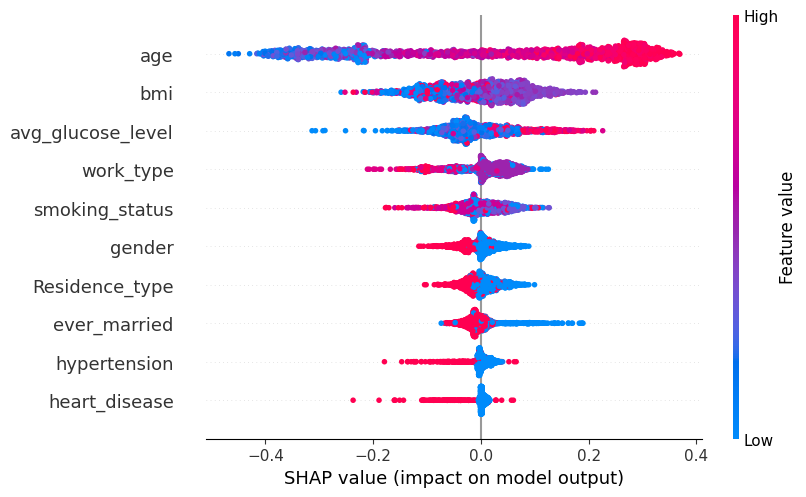

In [12]:
explainer = shap.Explainer(rf_model, X_test)
shap_values = explainer(X_test)

# Extract values for class 1 (stroke = 1)
shap_values_class1 = shap_values[:, :, 1]

# Now plot
shap.plots.beeswarm(shap_values_class1)
